<a href="https://colab.research.google.com/github/FMurunga/DataScience-Projects/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_excel('https://raw.github.com/FMurunga/DataScience-Projects/main/Telco_customer_churn.xlsx')
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


Overview of the dataset

In [3]:
data.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [4]:
data.columns.values

array(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score',
       'CLTV', 'Churn Reason'], dtype=object)

In [5]:
data.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [6]:
data.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [7]:
data.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

Exploration Data Analysis
1.Customer Data Exploration

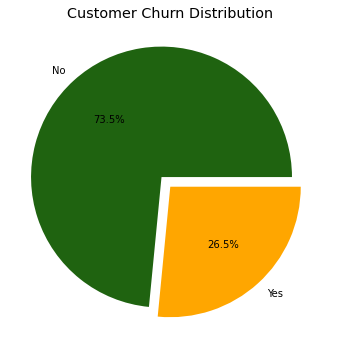

In [72]:
#Customer churn data analysis
#Target Variable Exploration
colors = ('#1f6310','#ffa600')
explode = (0.1,0.0)
_, ax = plt.subplots(figsize=(10,6))
data.groupby("Churn Label").size().plot(kind='pie', autopct='%1.1f%%', colors = colors, explode=explode)
ax.set_title("Customer Churn Distribution")
ax.set_ylabel('')
plt.show()

at least 74% of the customers are not churned according to the data provided

**1. Demographics Exploration : identify customer representation by demographics in the dataset i.e by gender,age range,partners and dependency according to the dataset.**

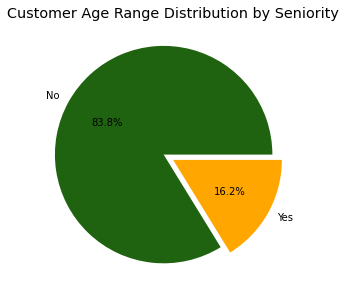

In [70]:
#@title Explore customer data by seniority
#Explore customer data by seniority
explode = (0.1,0.0)
colors = ('#1f6310','#ffa600')
_, ax = plt.subplots(figsize=(5,5))
ax = (data['Senior Citizen'].value_counts()/len(data))\
.plot(kind='pie', autopct='%.1f%%', labels = ['No', 'Yes'],colors =colors,explode = explode)
ax.set_title("Customer Age Range Distribution by Seniority")
ax.set_ylabel('')
plt.show()

Only 16% of the customers in the dataset are senior citizens therefore the customers are mainly younger citizens

In [20]:
age_count = data['Gender'].value_counts()
print(age_count)
age_count_percentage = data['Gender'].value_counts()*100/len(data)
age_count_percentage

Male      3555
Female    3488
Name: Gender, dtype: int64


Male      50.47565
Female    49.52435
Name: Gender, dtype: float64

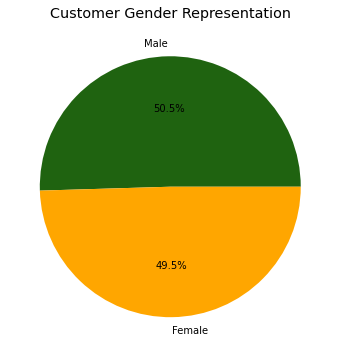

In [47]:
#@title Customer Gender Distribution

colors = ('#1f6310','#ffa600')
_, ax = plt.subplots(figsize=(10,6))
ax = age_count_percentage\
.plot(kind='pie', autopct='%.1f%%',colors =colors)
ax.set_title("Customer Gender Representation")
ax.set_ylabel('')
plt.show()

**There is almost a balance in the gender representation of the customers with the male gender being slightly higher than females by 1%.**

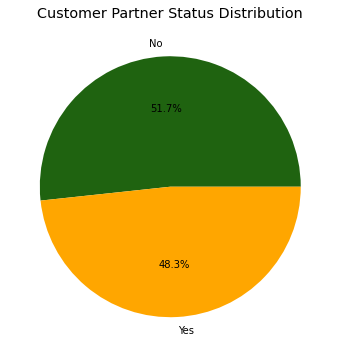

In [74]:
#@title Partner Status Representation

partner_count_percentage = data['Partner'].value_counts()*100/len(data)

colors = ('#1f6310','#ffa600')
_, ax = plt.subplots(figsize=(10,6))
ax = partner_count_percentage\
.plot(kind='pie', autopct='%.1f%%',colors =colors)
ax.set_title("Customer Partner Status Distribution")
ax.set_ylabel('')
plt.show()

**52% of the customers do not have partners**

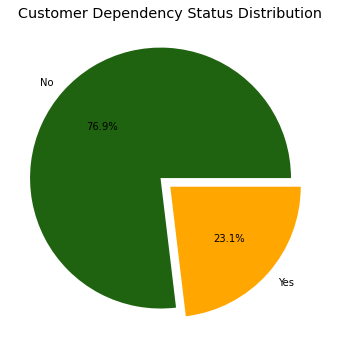

In [75]:
#@title Customer Dependency Status Representation

dependent_count_percentage = data['Dependents'].value_counts()*100/len(data)
explode = (0.1,0.0)
colors = ('#1f6310','#ffa600')
_, ax = plt.subplots(figsize=(10,6))
ax = dependent_count_percentage\
.plot(kind='pie', autopct='%.1f%%',colors =colors, explode=explode)
ax.set_title("Customer Dependency Status Distribution")
ax.set_ylabel('')
plt.show()

**At least 77% of the Customers do not have dependents**

In [59]:
#Partner and dependency status
dependents_partners = data.groupby(['Partner', 'Dependents']).size().unstack()
dependents_partners

Dependents,No,Yes
Partner,,
No,3339,302
Yes,2077,1325


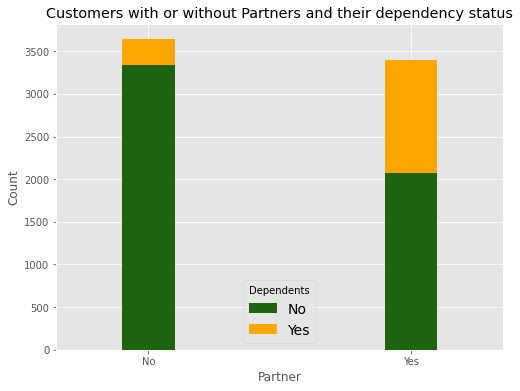

In [76]:
colors = ('#1f6310','#ffa600')

ax = (dependents_partners.plot(kind='bar',width = 0.2,stacked = True,rot = 0,figsize = (8,6),color= colors))
ax.set_title("Customers with or without Partners and their dependency status")
ax.set_ylabel('Count')
ax.legend(prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_xlabel('Partner')
plt.show()

**Customers who have no partners have fewer dependents compared to those who have partners**

**2. Customer Account Information Exploration: explore customer tenure and contracts**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


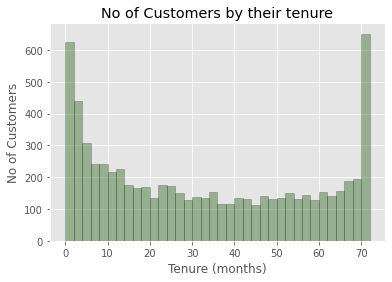

In [82]:
ax= sns.distplot(data['Tenure Months'],hist=True, bins= int(180/5), color='#20610f',kde=False, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('No of Customers by their tenure')
plt.show()

**From the above plot, A lot of customers have been with the company for just a month while also quite a bunch have been there for at least 72 months. The difference could be because different customers have different contracts with the company.**

In [83]:
#Customer contracts
contract_counts = data['Contract'].value_counts()
contract_counts


Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

Text(0.5, 1.0, 'Customers Representation by Contract Type')

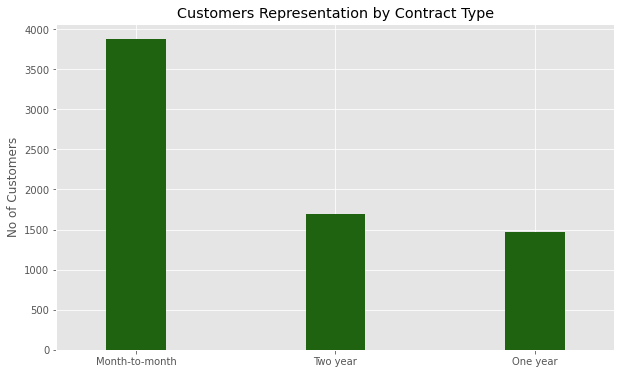

In [86]:
ax = contract_counts.plot(kind = 'bar',rot = 0, width = 0.3, color= '#1f6310', figsize=(10,6))
ax.set_ylabel('No of Customers')
ax.set_title('Customers Representation by Contract Type')


**From the above plot, Most customers are based on a Month-to- Month Contract with the company**